1. Analizar la calidad de datos, para lo que debes cargarlos y realizar un proceso
exhaustivo de limpieza para eliminar valores faltantes, duplicados y atípicos que
puedan afectar la calidad del modelo, si los hay.


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#FernandoSanchez Cargar el archivo de datos
file_path = "/content/house_data.xlsx"
house_data = pd.read_excel(file_path)

#FernandoSanchez Mostrar las primeras filas para verificar la carga correcta
print("Primeras filas de los datos:")
print(house_data.head())

#FernandoSanchez Verificar la calidad de los datos
print("\nInformación de los datos:")
print(house_data.info())

#FernandoSanchez Estadísticas descriptivas de los datos numéricos
print("\nEstadísticas descriptivas de las variables numéricas:")
print(house_data.describe())

#FernandoSanchez Tratar con valores faltantes
print("\nValores faltantes antes de la limpieza:")
print(house_data.isnull().sum())

#FernandoSanchez Eliminar duplicados
house_data.drop_duplicates(inplace=True)

#FernandoSanchez Eliminar filas con valores faltantes
house_data.dropna(inplace=True)

#FernandoSanchez Convertir la columna 'date' a formato de fecha y hora
house_data['date'] = pd.to_datetime(house_data['date'])

#FernandoSanchez Extraer el año de la fecha y utilizarlo como una nueva característica numérica
house_data['year'] = house_data['date'].dt.year

#FernandoSanchez Eliminar la columna original 'date'
house_data.drop(columns=['date'], inplace=True)







Primeras filas de los datos:
           id             date   price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900         3       1.00         1180   
1  6414100192  20141209T000000  538000         3       2.25         2570   
2  5631500400  20150225T000000  180000         2       1.00          770   
3  2487200875  20141209T000000  604000         4       3.00         1960   
4  1954400510  20150218T000000  510000         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0           0     0          3      7        1180   
1      7242     2.0           0     0          3      7        2170   
2     10000     1.0           0     0          3      6         770   
3      5000     1.0           0     0          5      7        1050   
4      8080     1.0           0     0          3      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0

2. Realizar un análisis descriptivo de las variables para entender la distribución de los
datos y detectar posibles relaciones entre las características y los precios. En esto
debes incluir un análisis de correlaciones entre las variables principalmente con el
precio de las casas


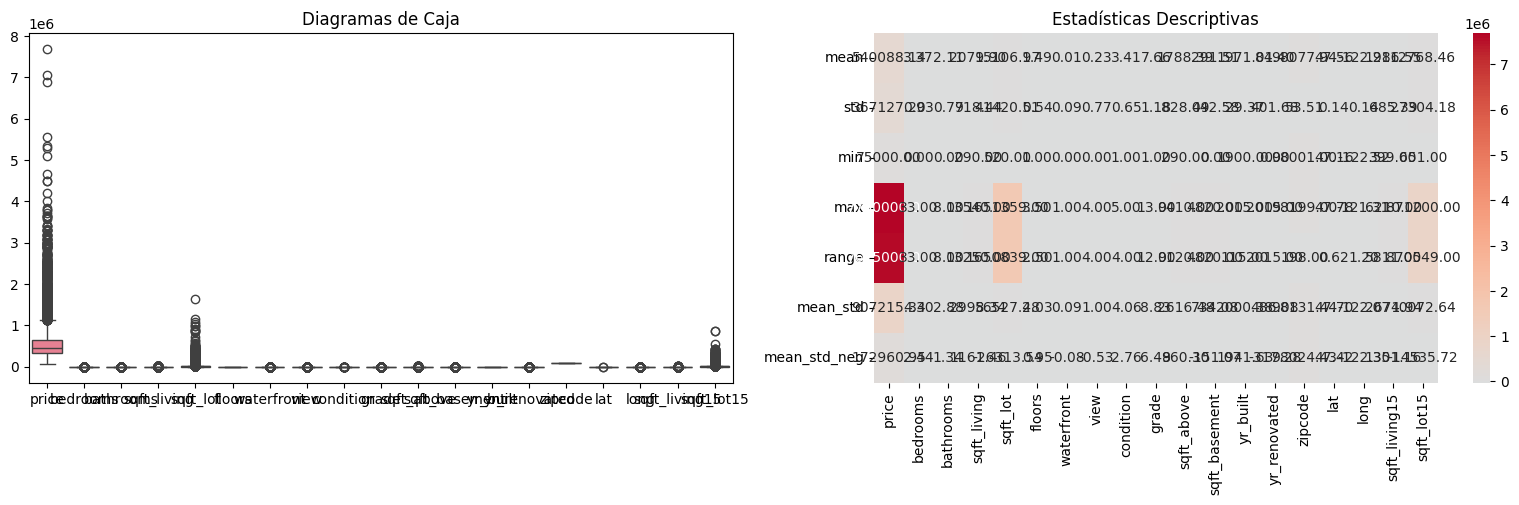

<Figure size 2000x1000 with 0 Axes>

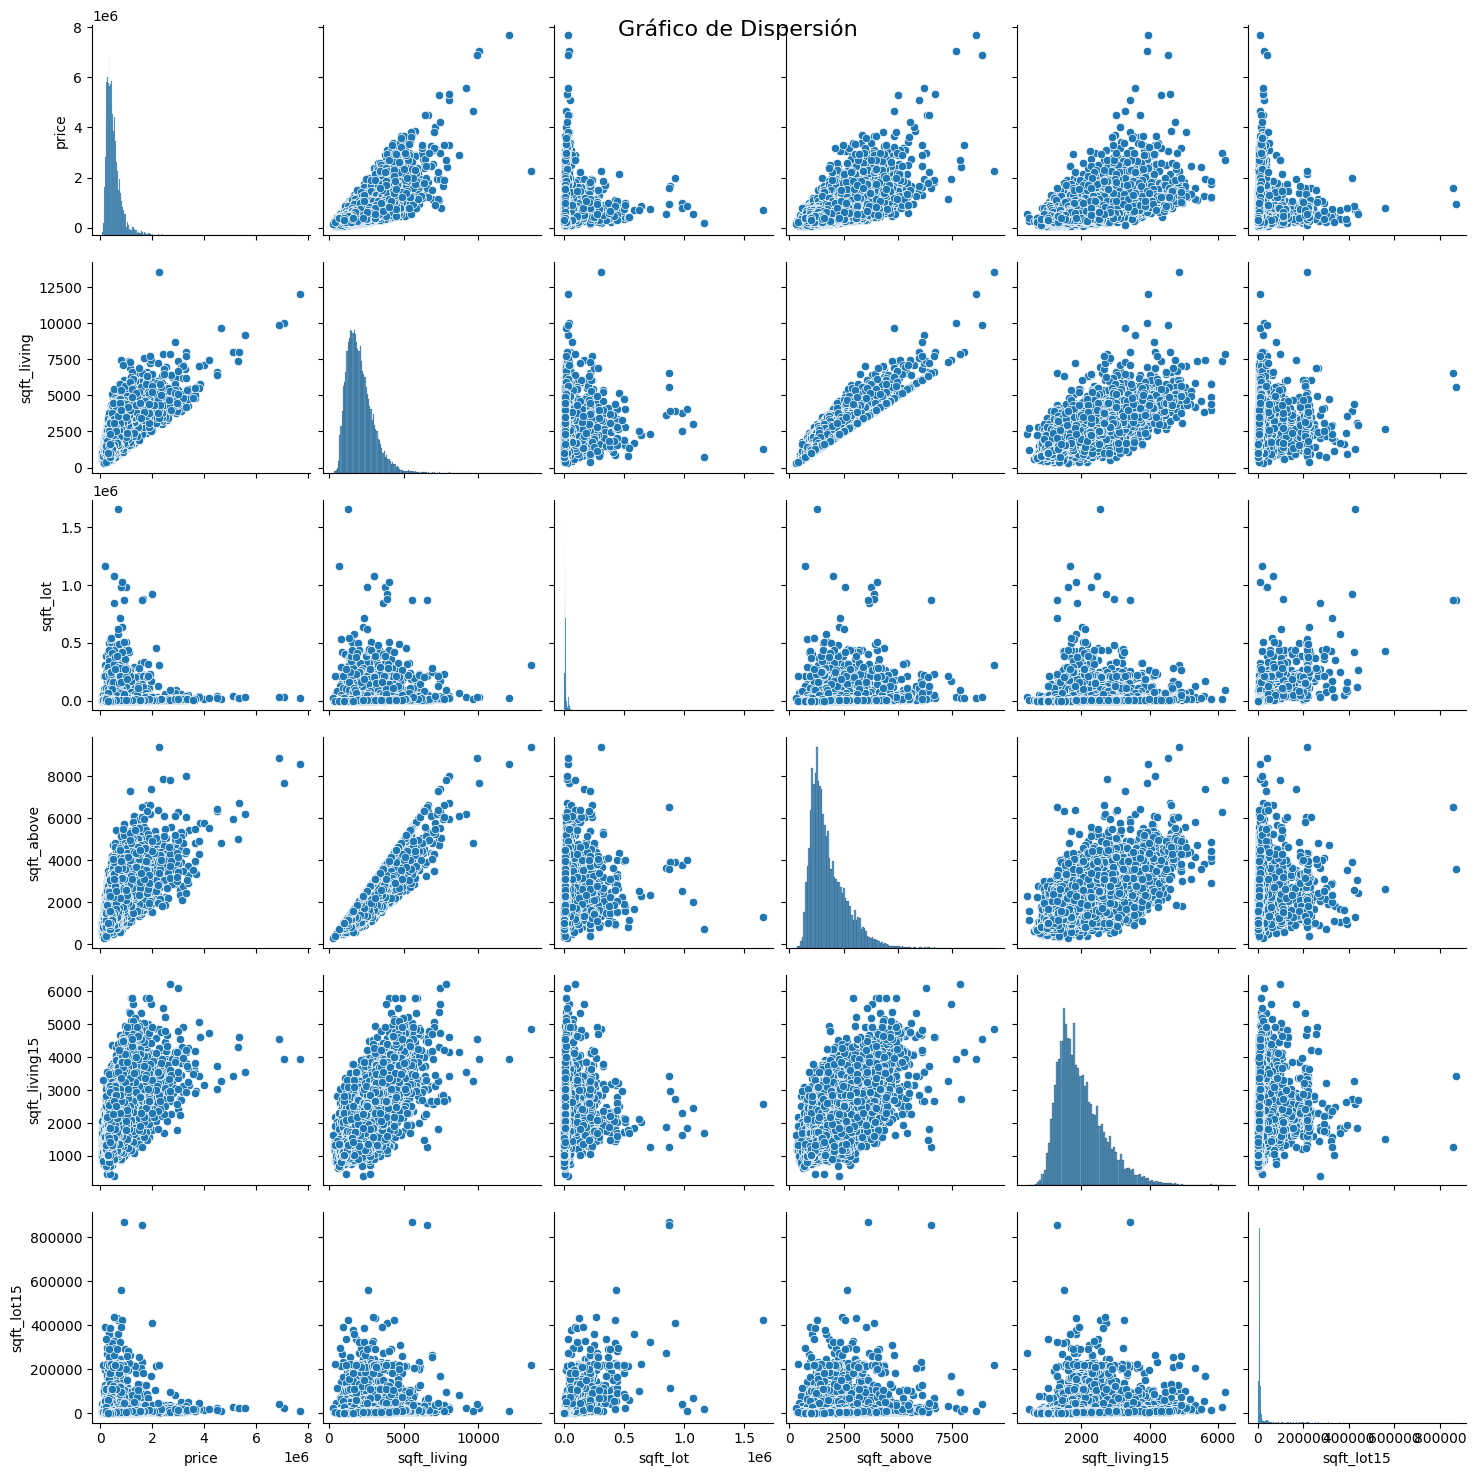

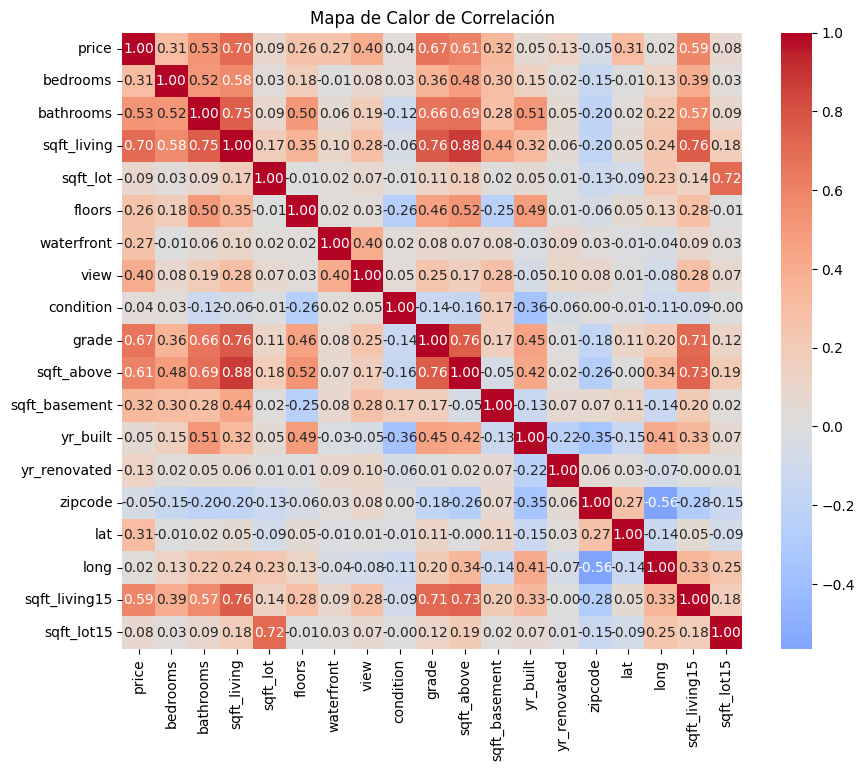

'Parece que las variables relacionadas con el tamaño de la vivienda tienen correlaciones significativas. \nLa correlación entre sqft_above y sqft_living es bastante alta (0.876597), lo que indica una fuerte relación lineal positiva entre el área \npor encima del suelo y el área habitable total.\nPor otro lado, la correlación entre sqft_living15 y sqft_living también es notable (0.756420), \nlo que sugiere una relación moderada entre el área habitable de una casa y el área habitable promedio de las casas en el vecindario.\nAdemás, la correlación entre sqft_living15 y sqft_above (0.731870) también es bastante alta.\nLas graficas confirman la correlación.'

In [12]:

#FernandoSanchez Lista de variables numéricas relevantes
numeric_vars = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
                'floors', 'waterfront', 'view', 'condition', 'grade',
                'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
                'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

#FernandoSanchez Crear el primer conjunto de gráficos
plt.figure(figsize=(20, 10))

#FernandoSanchez Diagramas de caja
plt.subplot(2, 2, 1)
sns.boxplot(data=house_data[numeric_vars], orient='v')
plt.title('Diagramas de Caja')

#FernandoSanchez Estadísticas descriptivas
plt.subplot(2, 2, 2)
desc_stats = house_data[numeric_vars].describe()
desc_stats.loc['range'] = desc_stats.loc['max'] - desc_stats.loc['min']
desc_stats.loc['mean_std'] = desc_stats.loc['mean'] + desc_stats.loc['std']
desc_stats.loc['mean_std_neg'] = desc_stats.loc['mean'] - desc_stats.loc['std']
sns.heatmap(desc_stats.drop(['count', '25%', '50%', '75%']), annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title('Estadísticas Descriptivas')

#FernandoSanchez Crear el segundo conjunto de gráficos
plt.figure(figsize=(20, 10))

#FernandoSanchez Gráfico de dispersión
scatter_vars = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15']
sns.pairplot(house_data[scatter_vars])
plt.suptitle('Gráfico de Dispersión', fontsize=16)
plt.show()

#FernandoSanchez Mapa de calor de correlación
plt.figure(figsize=(10, 8))
corr = house_data[numeric_vars].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title('Mapa de Calor de Correlación')
plt.show()

"""Parece que las variables relacionadas con el tamaño de la vivienda tienen correlaciones significativas.
La correlación entre sqft_above y sqft_living es bastante alta (0.876597), lo que indica una fuerte relación lineal positiva entre el área
por encima del suelo y el área habitable total.
Por otro lado, la correlación entre sqft_living15 y sqft_living también es notable (0.756420),
lo que sugiere una relación moderada entre el área habitable de una casa y el área habitable promedio de las casas en el vecindario.
Además, la correlación entre sqft_living15 y sqft_above (0.731870) también es bastante alta.
Las graficas confirman la correlación."""

3. Aplicar técnicas de transformación de datos, como normalización o estandarización,
para asegurar que las variables estén en una escala comparable. Luego de ello,
divide el conjunto de datos en conjuntos de entrenamiento y prueba de manera
aleatoria o estratificada.


In [15]:
#FernandoSanchez Crear DataFrame con las correlaciones obtenidas
correlations = {
    'sqft_above': ['sqft_living', 'grade', 'bathrooms', 'sqft_living15', 'price'],
    'sqft_living': ['sqft_above', 'grade', 'bathrooms', 'sqft_living15', 'price'],
    'grade': ['sqft_living', 'sqft_above', 'price'],
    'sqft_living15': ['sqft_living', 'sqft_above', 'price']
}
df_correlations = pd.DataFrame(correlations.items(), columns=['Variable', 'Variables_relacionadas'])

#FernandoSanchez Mostrar el DataFrame con las correlaciones
print("Correlaciones entre variables:")
print(df_correlations)

#FernandoSanchez Cargar el archivo de datos
file_path = "/content/house_data.xlsx"
house_data = pd.read_excel(file_path)

#FernandoSanchez Normalización de los datos
scaler = MinMaxScaler()
numeric_columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
                    'floors', 'waterfront', 'view', 'condition', 'grade',
                    'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
                    'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
house_data[numeric_columns] = scaler.fit_transform(house_data[numeric_columns])

#FernandoSanchez División del conjunto de datos en entrenamiento y prueba
X = house_data.drop(['price'], axis=1)  # Características
y = house_data['price']  # Etiqueta

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#FernandoSanchez Verificar las dimensiones de los conjuntos de entrenamiento y prueba
print("Dimensiones del conjunto de entrenamiento (Características):", X_train.shape)
print("Dimensiones del conjunto de prueba (Características):", X_test.shape)
print("Dimensiones del conjunto de entrenamiento (Etiquetas):", y_train.shape)
print("Dimensiones del conjunto de prueba (Etiquetas):", y_test.shape)


Correlaciones entre variables:
        Variable                             Variables_relacionadas
0     sqft_above  [sqft_living, grade, bathrooms, sqft_living15,...
1    sqft_living  [sqft_above, grade, bathrooms, sqft_living15, ...
2          grade                   [sqft_living, sqft_above, price]
3  sqft_living15                   [sqft_living, sqft_above, price]
Dimensiones del conjunto de entrenamiento (Características): (17290, 20)
Dimensiones del conjunto de prueba (Características): (4323, 20)
Dimensiones del conjunto de entrenamiento (Etiquetas): (17290,)
Dimensiones del conjunto de prueba (Etiquetas): (4323,)


4. Implementar modelos de regresión lineal con regularización, como Ridge, Lasso o
Elastic Net y ajuste los hiper parámetros mostrando como se mueve los
hiperparametros y el ajuste. Además, debes construir modelos de árboles de
regresión para capturar relaciones no lineales y complejas entre las variables
predictoras y el precio de las casas.


In [38]:
#FernandoSanchez  Dividir los datos en características (X) y etiquetas (y)
X = house_data.drop(columns=['price'])
y = house_data['price']

#FernandoSanchez  Normalizar las características
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

#FernandoSanchez  Lista de alphas para Ridge y Lasso
alphas = [0.001, 0.01, 0.1, 1, 10]

#FernandoSanchez  Modelo Ridge
print("Modelo: Ridge")
for alpha in alphas:
    model_ridge = Ridge(alpha=alpha)
    model_ridge.fit(X_train, y_train)
    y_pred_ridge = model_ridge.predict(X_test)
    r2_ridge = r2_score(y_test, y_pred_ridge)
    print(f"Alpha: {alpha}, R^2: {r2_ridge}")

#FernandoSanchez  Modelo Lasso
print("\nModelo: Lasso")
for alpha in alphas:
    model_lasso = Lasso(alpha=alpha, max_iter=30000)
    model_lasso.fit(X_train, y_train)
    y_pred_lasso = model_lasso.predict(X_test)
    r2_lasso = r2_score(y_test, y_pred_lasso)
    print(f"Alpha: {alpha}, R^2: {r2_lasso}")

#FernandoSanchez  Modelo ElasticNet
print("\nModelo: ElasticNet")
for alpha in alphas:
    model_elasticnet = ElasticNet(alpha=alpha, max_iter=20000)
    model_elasticnet.fit(X_train, y_train)
    y_pred_elasticnet = model_elasticnet.predict(X_test)
    r2_elasticnet = r2_score(y_test, y_pred_elasticnet)
    print(f"Alpha: {alpha}, R^2: {r2_elasticnet}")

#FernandoSanchez  Ajustar modelos de árbol de regresión
#FernandoSanchez Lista de profundidades y número mínimo de muestras para dividir
depths = [None, 5, 10, 20]
min_samples_splits = [2, 5, 10]

print("\nResultados del árbol de regresión:")
for depth in depths:
    for min_samples_split in min_samples_splits:
        model_tree = DecisionTreeRegressor(max_depth=depth, min_samples_split=min_samples_split)
        model_tree.fit(X_train, y_train)
        y_pred_tree = model_tree.predict(X_test)
        r2_tree = r2_score(y_test, y_pred_tree)
        print(f"Profundidad: {depth}, Min. muestras split: {min_samples_split}, R^2: {r2_tree}")
"""Ridge Regression:
Se observa que el R cuadrado (R^2) es bastante estable en diferentes valores de alpha, lo que indica que el modelo Ridge no está muy sensible a los cambios en la regularización.
Los valores de R^2 están alrededor de 0.70, lo que sugiere que el modelo explica aproximadamente el 70% de la varianza en los datos de prueba.
Lasso Regression:
Se observa que los valores de R^2 son consistentes con los obtenidos en Ridge.
Sin embargo, Lasso parece producir algunas advertencias de convergencia que pueden necesitar atención.
ElasticNet:
ElasticNet combina la regularización de Lasso y Ridge, por lo que se espera un rendimiento similar.
Los valores de R^2 son similares a los de Ridge y Lasso para alphas bajos, pero comienzan a degradarse significativamente para alphas más altos.
Árbol de Regresión:
Se probaron diferentes profundidades máximas del árbol y números mínimos de muestras para dividir.
El modelo de árbol de regresión parece tener un rendimiento variable dependiendo de la profundidad y el número mínimo de muestras para dividir.
Se observa que el mejor rendimiento se logra con una profundidad máxima de 10 y un número mínimo de muestras para dividir de 10, con un R^2 de aproximadamente 0.77."""

Modelo: Ridge
Alpha: 0.001, R^2: 0.7026255106811282
Alpha: 0.01, R^2: 0.7026254941061053
Alpha: 0.1, R^2: 0.7026253283437837
Alpha: 1, R^2: 0.7026236695118344
Alpha: 10, R^2: 0.7026069607330492

Modelo: Lasso


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.995e+13, tolerance: 2.259e+11
  model = cd_fast.enet_coordinate_descent(


Alpha: 0.001, R^2: 0.702625512274035


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.995e+13, tolerance: 2.259e+11
  model = cd_fast.enet_coordinate_descent(


Alpha: 0.01, R^2: 0.7026255100352699


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.996e+13, tolerance: 2.259e+11
  model = cd_fast.enet_coordinate_descent(


Alpha: 0.1, R^2: 0.7026254876445724


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.312e+11, tolerance: 2.259e+11
  model = cd_fast.enet_coordinate_descent(


Alpha: 1, R^2: 0.7026248517444822
Alpha: 10, R^2: 0.7026176359195011

Modelo: ElasticNet
Alpha: 0.001, R^2: 0.7026094899241239
Alpha: 0.01, R^2: 0.7024564486165847
Alpha: 0.1, R^2: 0.7002553181148266
Alpha: 1, R^2: 0.6637759197827173
Alpha: 10, R^2: 0.4150486422489035

Resultados del árbol de regresión:
Profundidad: None, Min. muestras split: 2, R^2: 0.7342365812629017
Profundidad: None, Min. muestras split: 5, R^2: 0.7205631168604052
Profundidad: None, Min. muestras split: 10, R^2: 0.7591452638602993
Profundidad: 5, Min. muestras split: 2, R^2: 0.6672065099380847
Profundidad: 5, Min. muestras split: 5, R^2: 0.7026056505503245
Profundidad: 5, Min. muestras split: 10, R^2: 0.6880468948233627
Profundidad: 10, Min. muestras split: 2, R^2: 0.7099116568313288
Profundidad: 10, Min. muestras split: 5, R^2: 0.7416988087756542
Profundidad: 10, Min. muestras split: 10, R^2: 0.7685217565725377
Profundidad: 20, Min. muestras split: 2, R^2: 0.7370945119576162
Profundidad: 20, Min. muestras split: 5

5. Utilizar métricas de evaluación de regresión, como el Error Cuadrático Medio (MSE),
el Error Absoluto Medio (MAE) y el Coeficiente de Determinación (R²), para medir el
rendimiento del modelo y concluir sobre ellos.


In [41]:

#FernandoSanchez Predicciones de Ridge Regression
y_pred_ridge = model_ridge.predict(X_test)

#FernandoSanchez Predicciones de Lasso Regression
y_pred_lasso = model_lasso.predict(X_test)

#FernandoSanchez Predicciones de ElasticNet
y_pred_elasticnet = model_elasticnet.predict(X_test)

#FernandoSanchez Predicciones del Árbol de Regresión
y_pred_tree = model_tree.predict(X_test)

#FernandoSanchez Calcular métricas para Ridge Regression
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

#FernandoSanchez Calcular métricas para Lasso Regression
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

#FernandoSanchez Calcular métricas para ElasticNet
mse_elasticnet = mean_squared_error(y_test, y_pred_elasticnet)
mae_elasticnet = mean_absolute_error(y_test, y_pred_elasticnet)
r2_elasticnet = r2_score(y_test, y_pred_elasticnet)

#FernandoSanchez Calcular métricas para Árbol de Regresión
mse_tree = mean_squared_error(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

#FernandoSanchez Mostrar resultados
print("Métricas de evaluación para Ridge Regression:")
print(f"MSE: {mse_ridge}, MAE: {mae_ridge}, R²: {r2_ridge}\n")

print("Métricas de evaluación para Lasso Regression:")
print(f"MSE: {mse_lasso}, MAE: {mae_lasso}, R²: {r2_lasso}\n")

print("Métricas de evaluación para ElasticNet:")
print(f"MSE: {mse_elasticnet}, MAE: {mae_elasticnet}, R²: {r2_elasticnet}\n")

print("Métricas de evaluación para Árbol de Regresión:")
print(f"MSE: {mse_tree}, MAE: {mae_tree}, R²: {r2_tree}\n")

"""Los modelos de Ridge y Lasso Regression muestran un rendimiento muy similar en términos de MSE, MAE y R².
ElasticNet tiene un MSE mucho más alto y un R² mucho más bajo en comparación con los modelos de Ridge y Lasso, lo que indica un peor ajuste del modelo.
El Árbol de Regresión muestra el MSE más bajo y el R² más alto entre los modelos presentados,
lo que sugiere un mejor rendimiento en la predicción en comparación con los modelos de regresión lineal regularizados.
En general, el Árbol de Regresión parece ser el mejor modelo en este conjunto de datos específico,
seguido por los modelos de regresión lineal regularizados (Ridge y Lasso). ElasticNet parece tener un rendimiento inferior en este caso."""

Métricas de evaluación para Ridge Regression:
MSE: 44958901924.45189, MAE: 126878.94596428507, R²: 0.7026069607330492

Métricas de evaluación para Lasso Regression:
MSE: 44957288084.861336, MAE: 126895.5044502201, R²: 0.7026176359195011

Métricas de evaluación para ElasticNet:
MSE: 88431023094.99509, MAE: 171485.77862858825, R²: 0.4150486422489035

Métricas de evaluación para Árbol de Regresión:
MSE: 36443169086.15773, MAE: 98748.07955064713, R²: 0.7589366209774491



'Los modelos de Ridge y Lasso Regression muestran un rendimiento muy similar en términos de MSE, MAE y R².\nElasticNet tiene un MSE mucho más alto y un R² mucho más bajo en comparación con los modelos de Ridge y Lasso, lo que indica un peor ajuste del modelo.\nEl Árbol de Regresión muestra el MSE más bajo y el R² más alto entre los modelos presentados, \nlo que sugiere un mejor rendimiento en la predicción en comparación con los modelos de regresión lineal regularizados.\nEn general, el Árbol de Regresión parece ser el mejor modelo en este conjunto de datos específico, \nseguido por los modelos de regresión lineal regularizados (Ridge y Lasso). ElasticNet parece tener un rendimiento inferior en este caso.'